In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
iris

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

df['species'] = iris.target
df

df = df.iloc[:, [0,3,1,2,4]]
df

df = df.iloc[:, 2:]
df

df = df[df['species'] != 0]
df.shape

(100, 3)

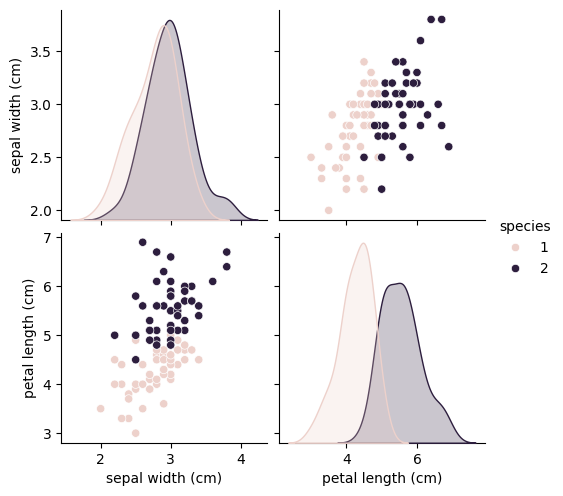

In [133]:
sns.pairplot(df, hue='species')

In [134]:
# for suffling

df = df.sample(100)
df

,sepal width (cm),petal length (cm),species
68,2.2,4.5,1
119,2.2,5.0,2
78,2.9,4.5,1
117,3.8,6.7,2
122,2.8,6.7,2
...,...,...,...
95,3.0,4.2,1
130,2.8,6.1,2
50,3.2,4.7,1
69,2.5,3.9,1


In [135]:
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [136]:
X_test = df_val.iloc[:,:-1]
y_test = df_val.iloc[:,-1]

y_test

,species
100,2
87,1
133,2
55,1
147,2


In [137]:
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

def evaluate(clf, X, y):
  clf.fit(X, y)
  plot_tree(clf)
  plot_decision_regions(X.values, y.values, clf)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


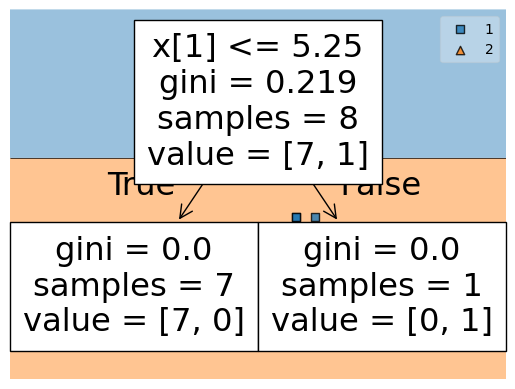

In [138]:
df1 = df_train.sample(8, replace=True)
dt1 = DecisionTreeClassifier()

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

evaluate(dt1, X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


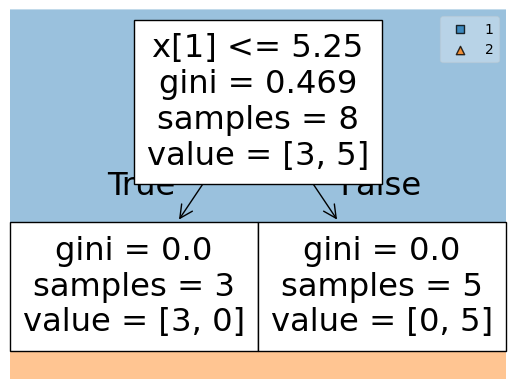

In [139]:
df2 = df_train.sample(8, replace=True)
dt2 = DecisionTreeClassifier()

X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

evaluate(dt2, X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


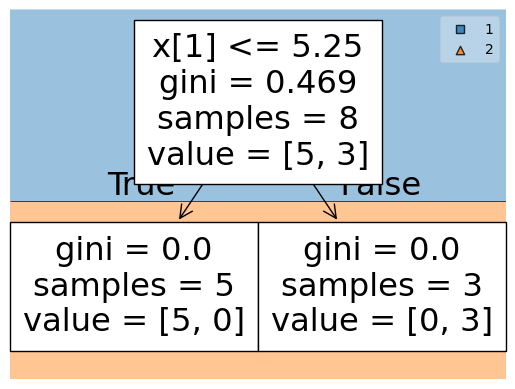

In [140]:
df3 = df_train.sample(8, replace=True)
dt3 = DecisionTreeClassifier()

X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

evaluate(dt3, X, y)

In [141]:
X_test

,sepal width (cm),petal length (cm)
100,3.3,6.0
87,2.3,4.4
133,2.8,5.1
55,2.8,4.5
147,3.0,5.2


In [142]:
for row in X_test.values:
  print(dt1.predict(np.array([row[0], row[1]]).reshape(1,2)))
  print(dt2.predict(np.array([row[0], row[1]]).reshape(1,2)))
  print(dt3.predict(np.array([row[0], row[1]]).reshape(1,2)))
  print("***********************")

[2]
[2]
[2]
***********************
[1]
[1]
[1]
***********************
[1]
[1]
[1]
***********************
[1]
[1]
[1]
***********************
[1]
[1]
[1]
***********************


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X

## Types of Bagging

In [143]:
df_new = df_train.sample(8, replace=False) # if replace = False i.e, pasting
df_new = df_train.sample(2, replace=False, axis=1) # and if axis = 1 i.e, column sampling -> random subspace
df_new = df_train.sample(8, replace=False).sample(2, replace=False, axis=1) # row sampling + column sampling -> random patches

In [144]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [145]:
X,y = make_classification(n_samples=10000, n_features=10, n_informative=3)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.921


In [148]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
bag.fit(X_train, y_train)

accuracy_score(y_test, bag.predict(X_test))

0.9425

In [149]:
print(bag.estimators_samples_, bag.estimators_features_)

[array([2523, 3113, 7114, ..., 5668, 7066, 3677]), array([4782,  663, 7155, ..., 3122, 2141, 5379]), array([5462, 6574, 4896, ..., 6686, 4871, 6424]), array([2848, 2629, 1591, ...,  595, 4333, 1671]), array([3821, 6494, 1606, ..., 1645, 3358,  388]), array([2261, 7922, 3649, ..., 7532, 6138, 1483]), array([ 652, 1676, 2291, ..., 2618,  113, 7628]), array([2478, 4107, 1958, ..., 5175, 7270, 3055]), array([5800, 3548, 6540, ..., 5313, 2336, 6608]), array([5256, 7181, 3409, ..., 3860, 3417, 5180]), array([2675, 2834, 3817, ...,  270, 2233,  103]), array([3236, 7607, 4600, ..., 5180, 5002, 3192]), array([4563, 4137, 6298, ..., 5296, 5676,  860]), array([2816, 5343, 5817, ..., 5489, 4283,  456]), array([2448, 2733, 5480, ..., 7046, 5681, 1372]), array([4248, 3828, 4630, ...,  767, 3976, 5795]), array([4815, 1867,  503, ..., 3767, 7526, 2513]), array([1688, 4132, 5218, ..., 5248, 3524, 6444]), array([4167, 2900, 3602, ..., 2322, 2670, 6725]), array([2920, 7645, 5452, ..., 3774, 7675, 4520]),

In [150]:
bag = BaggingClassifier(
    estimator=SVC(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
bag.fit(X_train, y_train)

accuracy_score(y_test, bag.predict(X_test))

0.87

In [151]:
print(bag.estimators_samples_, bag.estimators_features_)

[array([2523, 3113, 7114, ..., 5668, 7066, 3677]), array([4782,  663, 7155, ..., 3122, 2141, 5379]), array([5462, 6574, 4896, ..., 6686, 4871, 6424]), array([2848, 2629, 1591, ...,  595, 4333, 1671]), array([3821, 6494, 1606, ..., 1645, 3358,  388]), array([2261, 7922, 3649, ..., 7532, 6138, 1483]), array([ 652, 1676, 2291, ..., 2618,  113, 7628]), array([2478, 4107, 1958, ..., 5175, 7270, 3055]), array([5800, 3548, 6540, ..., 5313, 2336, 6608]), array([5256, 7181, 3409, ..., 3860, 3417, 5180]), array([2675, 2834, 3817, ...,  270, 2233,  103]), array([3236, 7607, 4600, ..., 5180, 5002, 3192]), array([4563, 4137, 6298, ..., 5296, 5676,  860]), array([2816, 5343, 5817, ..., 5489, 4283,  456]), array([2448, 2733, 5480, ..., 7046, 5681, 1372]), array([4248, 3828, 4630, ...,  767, 3976, 5795]), array([4815, 1867,  503, ..., 3767, 7526, 2513]), array([1688, 4132, 5218, ..., 5248, 3524, 6444]), array([4167, 2900, 3602, ..., 2322, 2670, 6725]), array([2920, 7645, 5452, ..., 3774, 7675, 4520]),

In [152]:
# Pasting
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)
bag.fit(X_train, y_train)

accuracy_score(y_test, bag.predict(X_test))

0.9495

In [153]:
print(bag.estimators_samples_, bag.estimators_features_)

[array([ 824, 7372, 5801, ..., 1814, 4440, 3443]), array([6338,  353, 1430, ..., 4843, 7514, 5659]), array([6229, 1207, 2634, ..., 2723, 3993, 7741]), array([2634, 4484, 1797, ..., 1379, 3445, 7864]), array([5852, 2330, 6355, ..., 5221, 1678,  352]), array([5363, 7748, 4411, ...,   14, 5875, 5336]), array([4647, 1987, 5917, ..., 3374, 5662, 7616]), array([5410, 6323, 7276, ..., 2565, 6211, 2092]), array([ 799, 1248, 4522, ..., 4146, 7168,  881]), array([7191, 6008, 1501, ..., 7485, 4963, 4733]), array([3285, 3972, 6547, ..., 7299, 7793, 5867]), array([4558, 1756, 7939, ..., 2390, 1809, 2673]), array([1315, 2761, 4372, ..., 6285, 7098, 3785]), array([1139,  934, 4976, ..., 6321, 7776, 3936]), array([5817, 5260, 2566, ..., 1474, 1018, 5843]), array([ 703, 5410, 7677, ..., 5201, 5845, 5079]), array([7596, 3532, 2585, ..., 6751, 3928, 3043]), array([7227,  884, 4938, ..., 4741, 2870, 7970]), array([3428, 6209, 5557, ...,  629, 7442, 1103]), array([ 924, 6704, 6229, ..., 5936, 5202, 4499]),

In [154]:
# Random Subspaces
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42,
    n_jobs=-1
)
bag.fit(X_train, y_train)

accuracy_score(y_test, bag.predict(X_test))

0.9285

In [155]:
print(bag.estimators_samples_, bag.estimators_features_)

[array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]), array([   0,    1,    2, ..., 7997, 7998, 7999]),

In [156]:
# Random Patches
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42,
    n_jobs=-1
)
bag.fit(X_train, y_train)

accuracy_score(y_test, bag.predict(X_test))

0.9085

In [157]:
print(bag.estimators_samples_, bag.estimators_features_)

[array([5011, 4466,  632, ..., 4721,  437,  605]), array([3429, 4330,  515, ..., 1103, 1474, 3163]), array([2298, 1192, 7356, ..., 6669, 3555, 1167]), array([5331,  959, 2422, ..., 3750, 4242, 3316]), array([4104, 7646, 6243, ..., 2999, 4109, 6663]), array([2777, 7155, 1485, ..., 3742, 3629, 3185]), array([ 227,  895, 5937, ..., 5090,  626, 3553]), array([3161, 6576, 1236, ..., 1522, 3234, 2616]), array([3980, 7795, 4662, ..., 4847,  297, 4331]), array([5575, 3894, 7994, ...,  615, 7159, 6828]), array([3371, 6086,  726, ..., 3869, 6810, 3321]), array([7374, 5553,  204, ..., 5556, 1822, 5804]), array([ 350, 6177, 1573, ...,    2, 7840, 4995]), array([4864, 3781, 6313, ..., 1465, 6229, 1709]), array([4731, 7693, 3820, ..., 7660, 6288, 6594]), array([2769, 4054,  275, ..., 4646, 7685, 3654]), array([1703, 1354, 1173, ..., 6958, 2444, 6260]), array([6708, 6406, 4267, ..., 3878, 2253, 4629]), array([3352, 1055, 6838, ..., 5547, 1713, 2436]), array([1047, 1158, 7386, ..., 5046, 5484, 5308]),

In [158]:
# OOB Score
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42,
    n_jobs=-1,
    oob_score=True
)
bag.fit(X_train, y_train)

print(accuracy_score(y_test, bag.predict(X_test)), bag.oob_score_)

0.9425 0.946375


In [159]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 500],
    'max_samples': [0.25, 0.5, 1.0],
    'bootstrap': [True, False],
    'max_features': [0.5, 1.0],
    'bootstrap_features': [True, False]
}

search = GridSearchCV(BaggingClassifier(), parameters, cv=5)
search.fit(X_train, y_train)

print(search.best_params_, search.best_score_)

KeyboardInterrupt: 

## Bagging Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
boston = fetch_openml(name="boston", version=1, as_frame=True)

X = boston.data
y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test.values)

print(r2_score(y_test, y_pred))

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(r2_score(y_test, y_pred))

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(r2_score(y_test, y_pred))

In [ ]:
bag = BaggingRegressor(random_state=42)
bag.fit(X_train, y_train)

print(bag.score(X_train, y_train), bag.score(X_test, y_test))

In [ ]:
parameters = {
    'estimator':[LinearRegression(), KNeighborsRegressor()],
    'n_estimators': [50, 100, 500],
    'max_samples': [0.25, 0.5, 1.0],
    'bootstrap': [True, False],
    'max_features': [0.5, 1.0],
    'bootstrap_features': [True, False]
}

search = GridSearchCV(BaggingRegressor(), parameters, cv=5)
search.fit(X_train, y_train)

print(search.best_params_, search.best_score_)